In [2]:
import pandas as pd 
import numpy as np 
#import datetime as date
#from pandas_profiling import ProfileReport
import folium
import requests
import geopy

import matplotlib.pyplot as plt
from datetime import date




In [3]:
spd = pd.read_csv('SPD_Crime_Data__2008-Present.csv',delimiter = ',')

In [4]:
spd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107581 entries, 0 to 107580
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              107581 non-null  int64  
 1   Report Number           107581 non-null  object 
 2   Offense ID              107581 non-null  int64  
 3   Offense Start DateTime  107581 non-null  object 
 4   Offense End DateTime    107581 non-null  object 
 5   Report DateTime         107581 non-null  object 
 6   Group A B               107581 non-null  object 
 7   Crime Against Category  107581 non-null  object 
 8   Offense Parent Group    107581 non-null  object 
 9   Offense                 107581 non-null  object 
 10  Offense Code            107581 non-null  object 
 11  Precinct                107581 non-null  object 
 12  Sector                  107581 non-null  object 
 13  Beat                    107581 non-null  object 
 14  MCPP                

In [51]:
#since there are no null values for 'Report datetime', using this column to grab only data from 2018-2020
cleaned_spd = spd.dropna()
cleaned_spd.info()
#spd['Report DateTime'].where('2020')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 463225 entries, 1 to 886547
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           463225 non-null  object 
 1   Offense ID              463225 non-null  int64  
 2   Offense Start DateTime  463225 non-null  object 
 3   Offense End DateTime    463225 non-null  object 
 4   Report DateTime         463225 non-null  object 
 5   Group A B               463225 non-null  object 
 6   Crime Against Category  463225 non-null  object 
 7   Offense Parent Group    463225 non-null  object 
 8   Offense                 463225 non-null  object 
 9   Offense Code            463225 non-null  object 
 10  Precinct                463225 non-null  object 
 11  Sector                  463225 non-null  object 
 12  Beat                    463225 non-null  object 
 13  MCPP                    463225 non-null  object 
 14  100 Block Address   

In [52]:
cleaned_spd['Report DateTime'] = pd.to_datetime(cleaned_spd['Report DateTime'])

In [56]:
mask = (cleaned_spd['Report DateTime']>'2017') & (cleaned_spd['Report DateTime']<'2020') 

In [59]:
cleaned_spd[mask].to_csv('sample_2018_2019')
    

In [64]:
spd_2018_2019 = cleaned_spd[mask]
profile = ProfileReport(spd_2018_2019, title = "SPD: 2018-2019")

In [65]:
profile

Render HTML: 100%|██████████| 1/1 [00:05<00:00,  5.17s/it]


In [2]:
profile.to_file('spd_2018-2019.html')

NameError: name 'profile' is not defined

In [112]:
SPD_data = pd.read_csv('sample_2018_2019.csv',delimiter = ',')
#SPD_data['Report DateTime'] = pd.to_datetime(SPD_data['Report DateTime'])
SPD_data.sort_values(by='Report DateTime', ascending = True, inplace = True)
SPD_data = SPD_data.iloc[:100000,:]


In [159]:
mask = SPD_data['Crime Against Category'] == 'PERSON'
#SPD_data[mask]

In [4]:
m = folium.Map(location=[47.63053012408091, -122.33246064193719], zoom_start = 12)
m.save('start_address.html')


In [49]:

def crime_marker(coord,category):
    colors = {'PROPERTY':'Yellow','PERSON':'Red','SOCIETY':'Dark Blue'}
    feature_property = folium.FeatureGroup('PROPERTY')
    feature_person = folium.FeatureGroup('PERSON')
    feature_society = folium.FeatureGroup('SOCIETY')
    group = {'PROPERTY':feature_property,'PERSON':feature_person,'SOCIETY':feature_society}
    for x, y in zip(coord, category):
        folium.CircleMarker(
            location = x,
            radius = .2,
            popup = y,
            color = colors[y],
            fill = True,
            fill_color = colors[y]
        ).add_to(group[y])
    for key in group.keys():
        group[key].add_to(m)
    

In [298]:
SPD_data['Coord'] = SPD_data[['Latitude', 'Longitude']].values.tolist()
crime_marker(SPD_data['Coord'],SPD_data['Crime Against Category'])
folium.LayerControl(position='topright',collapsed='False').add_to(m)

In [1]:
#m

In [4]:
m.save("test.html")

In [46]:


SPD_data['Offense Start DateTime']
SPD_data['Crime Against Category']
#dataframe of Person Crimes
def crime_cumsum_by_type(type):
    df =SPD_data[SPD_data['Crime Against Category'] == type].sort_values('Report DateTime', ascending = True)
    df['date']=pd.to_datetime(df['Report DateTime']).dt.date
    return df.groupby('date').count().cumsum()['Crime Against Category']



person_df =SPD_data[SPD_data['Crime Against Category'] == 'PERSON'].sort_values('Report DateTime', ascending = True)
person_df['date']=pd.to_datetime(person_df['Report DateTime']).dt.date
person_crimes = person_df.groupby('date').count().cumsum()['Crime Against Category']







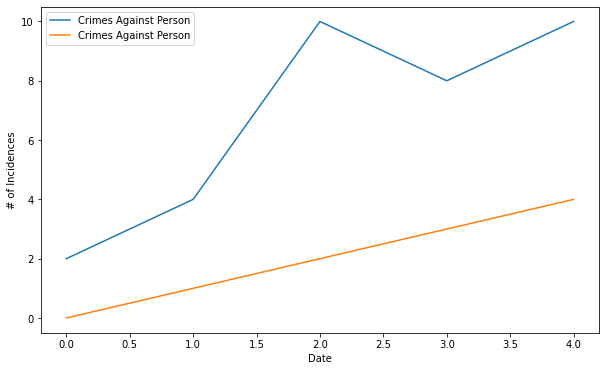

In [191]:
def plot_crime(x,y,label):

    #x -->list of dates 
    #y -->list of the cumsum of crime
    #label --> string of type of crime being plotted

    ax.plot(x,y, label = label)
    ax.set_xlabel('Date')
    ax.set_ylabel('# of Incidences')

    ax.legend()


fig, ax = plt.subplots(figsize = (10,6))
x = range(5)
y = [2,4,10,8,10]
x2 = range (5)
y2 = range(5)
lst = [[x,y],[x2,y2]]
for value in lst:
    plot_crime(value[0], value[1], 'Crimes Against Person')
    








In [7]:

from math import radians, cos, sin, asin, sqrt

def point_in_radius(lon1, lat1, lon2, lat2,radius):

    # """
    # Calculate the great circle distance between two points 
    # on the earth (specified in decimal degrees)
    # """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

center_point = [{'lat': -7.7940023, 'lng': 110.3656535}]
test_point = [{'lat': -7.79457, 'lng': 140.36563}]

lat1 = center_point[0]['lat']
lon1 = center_point[0]['lng']
lat2 = test_point[0]['lat']
lon2 = test_point[0]['lng']

radius = 1.00 # in kilometer

a = point_in_radius(lon1, lat1, lon2, lat2,radius)

print('Distance (miles) : ', a)
if a <= radius:
    print('Inside the area')
else:
    print('Outside the area')


Distance (miles) :  2051.77559622229
Outside the area


In [65]:
import json

def address_to_coord(address_string):
    #print(response.status_code)
    #print()
    result = address_string.replace(' ','+')
    query = f'https://nominatim.openstreetmap.org/search?q={result}&format=geojson'
    response = requests.get(f'https://nominatim.openstreetmap.org/search?q={query}&format=geojson')
    return(response.json())
    


In [67]:


#value = address_to_coord('20934 54th Ave W')
print(value['features'])

[]


In [32]:
address_to_coord = '1234 abc'
result = address_to_coord.replace(' ','+')
f'https://nominatim.openstreetmap.org/search?q={result}&format=geojson'

'https://nominatim.openstreetmap.org/search?q=1234+abc&format=geojson'

In [27]:
import geopy as geopy
from geopy.geocoders import Nominatim

def address_to_coord(address_string):
    #print(response.status_code)
    #print()
    geolocator = geopy.geocoders.MapQuest(api_key =	'E2jkOX2GsyC18ys4zRwZBAzY2nYd2MMR')
    location = geolocator.geocode(query = address_string, exactly_one = True)
    return location[1]
    
    #return geopy.geocoders.Nominatim(user_agent = 'Seattle_App', query = query, exactly_one = True, viewbox= (latitude,longitude), bounded = True)

In [28]:
address_to_coord('20934 54th Ave W, Lynnwood, WA, 98036')


(47.808786, -122.305899)

In [25]:
result[1]

(47.808786, -122.305899)

In [16]:
def crime_table(type, start, end):
    df =SPD_data[SPD_data['Crime Against Category'] == type].sort_values('Report DateTime', ascending = True)
    df['date']=pd.to_datetime(df['Report DateTime']).dt.date
    date_mask = (pd.to_datetime(df['date']) >= start) & (pd.to_datetime(df['date']) >= end)
    return df[date_mask].groupby('Offense').count()['Report Number']

crime_table('PERSON', '2017-1-4', '2017-1-6')

Offense
Aggravated Assault    1088
Intimidation          1365
Simple Assault        2189
Name: Report Number, dtype: int64

In [70]:
def crime_table(type, start, end):
    df =SPD_data[SPD_data['Crime Against Category'] == type].sort_values('Report DateTime', ascending = True)
    df['date']=pd.to_datetime(df['Report DateTime']).dt.date
    #print(df)
    date_mask = (pd.to_datetime(df['date']) >= start) & (pd.to_datetime(df['date']) >= end)
    return df[date_mask].groupby('Offense').count()['Report Number'].reset_index()

  
crime_table('PROPERTY', '2017-01-01','2017-01-02')  


,Offense,Report Number
0,Burglary/Breaking & Entering,7
1,Counterfeiting/Forgery,1
2,Credit Card/Automated Teller Machine Fraud,1
3,Destruction/Damage/Vandalism of Property,2
4,Impersonation,1
5,Motor Vehicle Theft,5
6,Pocket-picking,1
7,Theft From Building,2
8,Theft From Motor Vehicle,3
9,Theft of Motor Vehicle Parts or Accessories,1


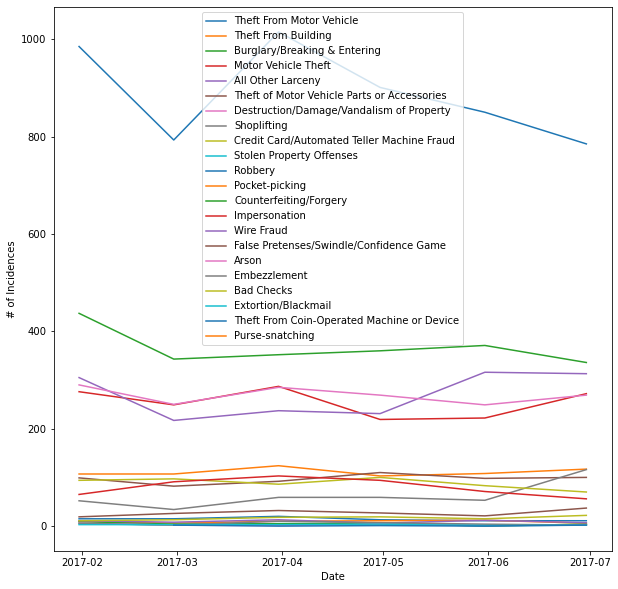

In [204]:
def crime_trend_plot(type, start):

    df =SPD_data[SPD_data['Crime Against Category'] == type].sort_values('Report DateTime', ascending = True)
    df['date']=pd.to_datetime(df['Report DateTime']).dt.date
    date_mask = (pd.to_datetime(df['date']) >= start) & (pd.to_datetime(df['date']) <= pd.to_datetime(start)+timedelta(days=90)) #selects only rows with certain timeframe
    df = df[date_mask]
    offense_names = df['Offense'].unique()
    #print(offense_names)
    
    for o_type in offense_names:
        df_off = df[df['Offense'] == o_type]
        df_off['date']=pd.to_datetime(df_off['date'])
        df_off=df_off.resample('M', on='date').count()
        #print(df_off['Report Number'])
        #print(df_off.index, df_off['date'])
        plot_crime(df_off.index,df_off['date'],o_type)
        
        
fig, ax = plt.subplots(figsize = (10,10))
crime_trend_plot('PROPERTY','2017-01-01')


# def plot_crime(x,y,label):

#     #x -->list of dates 
#     #y -->list of the cumsum of crime
#     #label --> string of type of crime being plotted

#     ax.plot(x,y, label = label)
#     ax.set_xlabel('Date')
#     ax.set_ylabel('# of Incidences')

#     ax.legend()







In [4]:
import geopy
def address_to_coord(address_string):
    #print(response.status_code)
    #print()
    geolocator = geopy.geocoders.MapQuest(api_key =	'E2jkOX2GsyC18ys4zRwZBAzY2nYd2MMR')
    location = geolocator.geocode(query = '20934 54th Ave W, Lynnwood, WA, 98036', exactly_one = True)
    m = folium.Map(location=location[1], zoom_start = 15)
    m.save("start_address.html")
    return
address_string = ''
address_to_coord(address_string)

In [48]:
test = pd.to_datetime(np.array(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31']))
from math import radians, cos, sin, asin, sqrt
        
def point_in_radius(lat1, lon1, lat2, lon2, radius):
    # """
    # Calculate the great circle distance between two points 
    # on the earth (specified in decimal degrees)
    # """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 3956 for miles
    if c*r<=radius:
        return True
    else:
        return False

def crimes_in_radius_dates(coord, radius, range):
    month_dict = {}
    for k,v in enumerate(test):
        month_dict[k+1]=v
    start_date = month_dict[range[0]]
    end_date = month_dict[range[1]]
    df = SPD_data
    df['Report DateTime']=pd.to_datetime(df['Report DateTime']).dt.date
    date_mask = (pd.to_datetime(df['Report DateTime']) >= start_date) &                 (pd.to_datetime(df['Report DateTime']) <= end_date)
    dff = df[date_mask]
    dff['coord'] = list(zip(dff['Latitude'], dff['Longitude']))
    
    # result = [point_in]
    # for value in dff['coord']:
    #     if point_in_radius(value[0],value[1],coord[0],coord[1],radius):
    #         radius_mask.append()

    result = [point_in_radius(value[0],value[1],coord[0],coord[1],radius) for           value in dff['coord']]
    return dff[result]


def address_to_coord(address_string,radius, range):
    #print(response.status_code)
    #print()
    geolocator = geopy.geocoders.MapQuest(api_key =	'E2jkOX2GsyC18ys4zRwZBAzY2nYd2MMR')
    location = geolocator.geocode(query = address_string, exactly_one = True)
    m = folium.Map(location=location[1], zoom_start = 15)
    folium.Marker(location = location[1], popup=location[1],
                    tooltip = '<i>Your Location</i>', icon=folium.Icon(color="green")).add_to(m)
    map_data = hf.crimes_in_radius_dates(location[1],radius,range)
    hf.crime_marker(map_data['coord'],map_data['Crime Against Category'])
    m.save("start_address.html")
    return open('start_address.html','r').read()


 

crimes_in_radius_dates((47.66905, -122.37787), 1, [1,3])

,Unnamed: 0,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,coord
77615,139326,2017-900917,7674659194,01/31/2017 06:40:00 AM,01/31/2017 06:45:00 AM,2017-01-31,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,N,J,J2,BALLARD NORTH,30TH AVE NW / NW 65TH ST,-122.395684,47.675884,"(47.67588424, -122.39568376)"
77604,139313,2017-900927,7636550060,01/29/2017 10:00:00 PM,01/30/2017 09:00:00 AM,2017-01-31,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,N,B,B2,PHINNEY RIDGE,54XX BLOCK OF BAKER AVE NW,-122.359840,47.668446,"(47.66844642, -122.359840308)"
77597,139300,2017-037511,7661822283,01/29/2017 04:30:00 PM,01/30/2017 12:00:00 PM,2017-01-31,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,B,B2,PHINNEY RIDGE,1XX BLOCK OF N 58TH ST,-122.357120,47.671190,"(47.67118959, -122.357119927)"
77591,139285,2017-037760,7692992318,01/26/2017 12:00:00 PM,01/31/2017 12:00:00 PM,2017-01-31,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,B,B1,BALLARD SOUTH,24XX BLOCK OF NW 58TH ST,-122.388865,47.670918,"(47.67091802, -122.388864868)"
99423,633943,2017-038155,7648397225,01/21/2017 12:00:00 PM,01/31/2017 06:00:00 PM,2017-01-31,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,N,B,B1,BALLARD SOUTH,22XX BLOCK OF NW 58TH ST,-122.386165,47.670914,"(47.67091421, -122.386164934)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73258,131531,2017-902855,7631157508,03/15/2017 02:30:00 PM,03/26/2017 03:30:00 PM,2017-03-30,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,N,J,J2,BALLARD NORTH,14XX BLOCK OF NW 65TH ST,-122.374978,47.675949,"(47.67594863, -122.374978091)"
73202,131433,2017-902883,7700379529,03/21/2017 12:35:00 PM,03/31/2017 12:35:00 PM,2017-03-31,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,N,B,B2,BALLARD SOUTH,11XX BLOCK OF NW 58TH ST,-122.372168,47.670898,"(47.67089799, -122.372167504)"
98550,631310,2017-112722,7628815928,03/30/2017 07:00:00 PM,03/31/2017 08:00:00 AM,2017-03-31,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,N,B,B1,BALLARD SOUTH,15XX BLOCK OF NW 54TH ST,-122.377550,47.667893,"(47.66789322, -122.377550141)"
73183,131386,2017-902898,7675031051,03/20/2017 07:45:00 PM,03/31/2017 07:45:00 PM,2017-03-31,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,N,B,B2,BALLARD SOUTH,58XX BLOCK OF 4TH AVE NW,-122.361851,47.671614,"(47.67161397, -122.361851121)"


In [56]:
options=[{'label': j, 'value': i} for i,j in {2:'2 mile radius', 4:'4 mile radius', 6:'6 mile radius'}.items()]

In [55]:
test = {2:'2 mile radius', 4:'4 mile radius', 6:'6 mile radius'}
lst = []
for i,j in test.items():
    lst.append ({'label':j,'value':i})
lst

[{'label': '2 mile radius', 'value': 2},
 {'label': '4 mile radius', 'value': 4},
 {'label': '6 mile radius', 'value': 6}]

In [53]:
test = {2:'2 mile radius', 4:'4 mile radius', 6:'6 mile radius'}
test.items()

dict_items([(2, '2 mile radius'), (4, '4 mile radius'), (6, '6 mile radius')])

In [117]:
import random
import scipy.stats as scipy

def testing(offense_type, n1,n2):
    #timedelta = pd.to_datetime(SPD_data['Report DateTime'].to_numpy()[-1]) - pd.to_datetime(SPD_data['Report DateTime'].to_numpy()[0])
    #days_in_sample = timedelta.days/30
    mask = (SPD_data['Offense'] == offense_type) & ((SPD_data['MCPP'].str.contains(n1)) | (SPD_data['MCPP'].str.contains(n2)))
    print(mask)
    df = SPD_data[mask]
    print(df)
    if df.empty!:
        return "Unable to compare these groups since one of the groups has no offenses of that type"
    
    df['test']=df.apply(lambda x: 1 if n2 in x['MCPP'] else 0,axis=1)
    df['Report DateTime'] = pd.to_datetime(df['Report DateTime'])
    dff = df[['Report DateTime','test']].sort_values('Report DateTime', ascending = True)
    dff_n1 = dff[dff['test'] == 0]
    dff_n2 = dff[dff['test'] == 1]
    #got the count of each group by month and then dropped the date column
    dff_n1 = dff_n1.resample('M', on='Report DateTime').count()['test'].reset_index()
    dff_n1 = dff_n1['test']
    dff_n2 = dff_n2.resample('M', on='Report DateTime').count()['test'].reset_index()
    dff_n2 = dff_n2['test']
    #mean of each group
    mean_n1 = np.mean(dff_n1)
    mean_n2 = np.mean(dff_n2)
    #variance of each group
    var_n1 = dff_n1.var(ddof=1)
    var_n2 = dff_n2.var(ddof=1)
    #std error of each group
    s_n1 = np.std(dff_n1)
    s_n2 = np.std(dff_n2)
    #t-statistic
    




    # df_n1= df[df['test'] == 0
    # df_n2= df[df['test'] == 1
  
    return scipy.ttest_ind(dff_n1,dff_n2,axis=0,equal_var=False,alternative = 'less')
     #df with all the rows coded by n1 =0 or n2 = 1 in the test column


testing('Prostitution', 'PIONEER SQUARE', 'SOUTH DELRIDGE')





99945     False
79876     False
79875     False
79874     False
79873     False
          ...  
107499    False
4414      False
4413      False
4412      False
4411      False
Length: 100000, dtype: bool
Empty DataFrame
Columns: [Unnamed: 0, Report Number, Offense ID, Offense Start DateTime, Offense End DateTime, Report DateTime, Group A B, Crime Against Category, Offense Parent Group, Offense, Offense Code, Precinct, Sector, Beat, MCPP, 100 Block Address, Longitude, Latitude]
Index: []


ValueError: Wrong number of items passed 18, placement implies 1

In [90]:
a = np.random.randn(10) + 2
a

array([0.77960649, 3.03554683, 2.50788325, 2.83097198, 0.87566953,
       0.92258174, 1.11465411, 2.33525417, 2.82573579, 1.82615523])

In [104]:
lst_sites = SPD_data['MCPP'].unique()

result = []
for site in lst_sites:
    result.append({'label': site,'value':site})
result

[{'label': 'DOWNTOWN COMMERCIAL', 'value': 'DOWNTOWN COMMERCIAL'},
 {'label': 'CAPITOL HILL', 'value': 'CAPITOL HILL'},
 {'label': 'QUEEN ANNE', 'value': 'QUEEN ANNE'},
 {'label': 'BELLTOWN', 'value': 'BELLTOWN'},
 {'label': 'ROOSEVELT/RAVENNA', 'value': 'ROOSEVELT/RAVENNA'},
 {'label': 'SANDPOINT', 'value': 'SANDPOINT'},
 {'label': 'SLU/CASCADE', 'value': 'SLU/CASCADE'},
 {'label': 'BALLARD NORTH', 'value': 'BALLARD NORTH'},
 {'label': 'BRIGHTON/DUNLAP', 'value': 'BRIGHTON/DUNLAP'},
 {'label': 'NORTHGATE', 'value': 'NORTHGATE'},
 {'label': 'UNIVERSITY', 'value': 'UNIVERSITY'},
 {'label': 'BALLARD SOUTH', 'value': 'BALLARD SOUTH'},
 {'label': 'WALLINGFORD', 'value': 'WALLINGFORD'},
 {'label': 'MORGAN', 'value': 'MORGAN'},
 {'label': 'FAUNTLEROY SW', 'value': 'FAUNTLEROY SW'},
 {'label': 'ROXHILL/WESTWOOD/ARBOR HEIGHTS',
  'value': 'ROXHILL/WESTWOOD/ARBOR HEIGHTS'},
 {'label': 'LAKECITY', 'value': 'LAKECITY'},
 {'label': 'BITTERLAKE', 'value': 'BITTERLAKE'},
 {'label': 'JUDKINS PARK/NOR